In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# inspector = inspect(engine)

# columns = inspector.get_columns('measurement')
# for column in columns:
#     print(column["name"], column["type"])

In [10]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)


# Exploratory Climate Analysis

Query Date:  2016-08-23


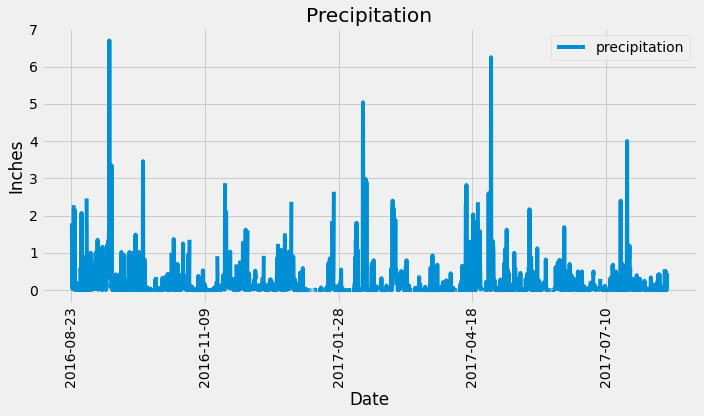

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
conn = engine.connect()
year = pd.read_sql('SELECT date, prcp FROM measurement WHERE date BETWEEN "2016-08-23" AND "2017-08-23"', conn)
year = year.set_index('date')
# Sort the dataframe by date
year_sorted = year.sort_index(ascending=True)
year_sorted = year_sorted.rename(columns={'prcp': 'precipitation'})
# Use Pandas Plotting with Matplotlib to plot the data
year_sorted.plot(title='Precipitation', rot='vertical', figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
# plt.savefig("Images/precipitation.png")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_table = year_sorted.agg({"precipitation": ['mean', 'median', 'var', 'std', 'sem']})
summary_table

,precipitation
mean,0.177279
median,0.020000
var,0.212696
std,0.461190
sem,0.010259


In [ ]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station).count()
station_count

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#session.query(Measurement.station, func.min(Measurement.tobs)).filter_by(station = 'USC00519281').all()

lowest_temp = session.query(func.min(Measurement.tobs)).filter_by(station = 'USC00519281').all()
#for temp in lowest_temp:
print(f'The lowest temperature recorded by station USC00519281 is: {lowest_temp}')

highest_temp = session.query(func.max(Measurement.tobs)).filter_by(station = 'USC00519281').all()
print(f'The highest temperature recorded by station USC00519281 is: {highest_temp}')

avg_temp = session.query(func.avg(Measurement.tobs)).filter_by(station = 'USC00519281').all()
print(f'The average temperature recorded by station USC00519281 is: {avg_temp}')

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
conn = engine.connect()
most_active_yr = pd.read_sql("SELECT date, tobs FROM measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23' AND station='USC00519281'", conn)

# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html?highlight=histogram
most_active_yr.plot.hist(bins=12, figsize=(10,6))
plt.xlabel('Temperature')
plt.savefig("Images/histogram.png")
plt.show()

In [ ]:
conn = engine.connect()
most_active_yr = pd.read_sql("SELECT date, tobs, station FROM measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23'", conn)
most_active_st = most_active_yr.loc[(most_active_yr['station'] == 'USC00519281')]
most_active_st

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
